### adv vs. contribution

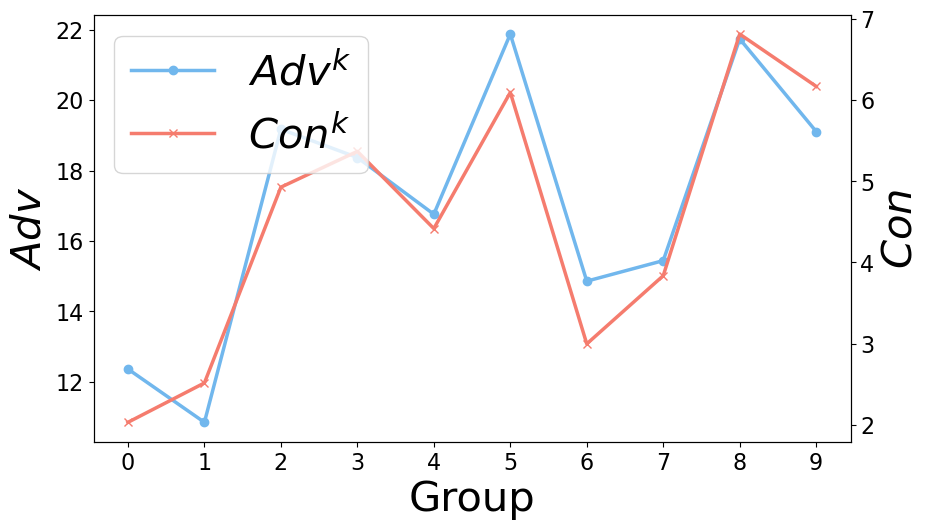

In [35]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

model = "LR"

# load norm
path = f'runs/demo_mnist_compare/{model}/regular/eps0' + '/models'
norm_grad = pd.read_csv(path+"/norm_avg_grad_per_epochs.csv")
norm_clip_grad = pd.read_csv(path+"/norm_clip_avg_grad_per_epochs.csv")

for i in range(10):
    col = f"norm_clip_avg_grad_{i}"
    norm_clip_grad[col] = norm_clip_grad[col] / norm_clip_grad["norm_clip_avg_grad"]

# 选择除 'norm_avg_grad' 之外的所有列
cols_to_plot = norm_clip_grad.drop(norm_clip_grad.columns[:2], axis=1)
#plot_single_vec(norm_grad['epoch'], cols_to_plot, cols_to_plot.columns.tolist())
norm_mean = cols_to_plot.mean().values
norm_last = cols_to_plot.iloc[-1].values

path = f'exp/demo_mnist/{model}/regular/eps0' + '/report'
with open(path+'/loss_acc.pkl', "rb") as file:
    all_acc = pickle.load(file)
all_adv_acc = [[2*value-1 for value in group] for group in all_acc]
group_adv_mean = np.array([np.mean(values) for values in all_adv_acc]) * 100


groups = np.arange(10)

# 全局字体大小设置
plt.rcParams.update({
    "font.size": 30,      # 默认字体大小
    "axes.labelsize": 30, # 坐标轴标签字体大小
    "xtick.labelsize": 16, # x轴刻度字体大小
    "ytick.labelsize": 16  # y轴刻度字体大小
})

# 创建一个图形
fig, ax1 = plt.subplots(figsize=(10, 6))

# 绘制第一个 y 轴（group_eps_mean）
# ax1.bar(groups, group_adv_mean, color='#84c3b7', alpha=0.8, label='group_adv_mean')
ax1.plot(groups, group_adv_mean, color='#71b7ed', marker='o', label=r'$Adv^k$', linewidth=2.5)
ax1.set_xlabel('Group')
ax1.set_ylabel(r'$Adv$')
ax1.tick_params(axis='y')

# 创建第二个 y 轴
ax2 = ax1.twinx()

# 绘制第二个 y 轴的折线图（group_norm_mean）
ax2.plot(groups, norm_mean, color='#f57c6e', marker='x', label=r'$Con^k$', linewidth=2.5)
ax2.set_ylabel(r'$Con$')
ax2.tick_params(axis='y')

# 合并两个坐标轴的图例，并设置位置
lines = ax1.get_lines() + ax2.get_lines()
labels = [line.get_label() for line in lines]
ax2.legend(lines, labels, loc="upper left")
# 设置标题
# plt.title('Group-wise Analysis: eps_mean and norm_mean')
plt.xticks(groups)
# plt.legend()
plt.tight_layout()
#plt.show()
path = "runs/demo_mnist_compare/figs_model/" + f"{model}.pdf"
plt.savefig(path, dpi=400, bbox_inches='tight')

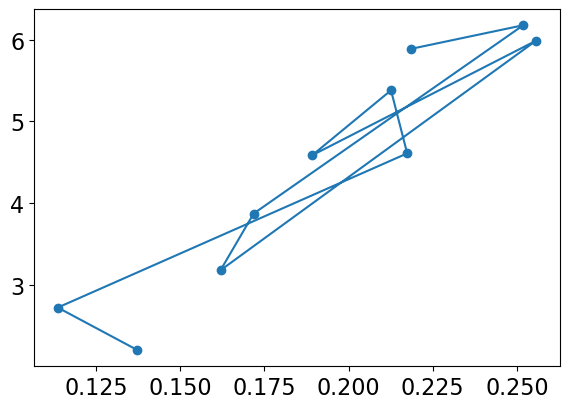

In [26]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

model = "MLP"

# load norm
path = f'runs/demo_mnist_compare/{model}/regular/eps0' + '/models'
norm_grad = pd.read_csv(path+"/norm_avg_grad_per_epochs.csv")
norm_clip_grad = pd.read_csv(path+"/norm_clip_avg_grad_per_epochs.csv")

for i in range(10):
    col = f"norm_clip_avg_grad_{i}"
    norm_clip_grad[col] = norm_clip_grad[col] / norm_clip_grad["norm_clip_avg_grad"]

# 选择除 'norm_avg_grad' 之外的所有列
cols_to_plot = norm_clip_grad.drop(norm_clip_grad.columns[:2], axis=1)
#plot_single_vec(norm_grad['epoch'], cols_to_plot, cols_to_plot.columns.tolist())
norm_mean = cols_to_plot.mean().values
norm_last = cols_to_plot.iloc[-1].values

path = f'exp/demo_mnist/{model}/regular/eps0' + '/report'
with open(path+'/loss_acc.pkl', "rb") as file:
    all_acc = pickle.load(file)
all_adv_acc = [[2*value-1 for value in group] for group in all_acc]
group_adv_mean = np.array([np.mean(values) for values in all_adv_acc])


groups = np.arange(10)

# 全局字体大小设置
plt.rcParams.update({
    "font.size": 30,      # 默认字体大小
    "axes.labelsize": 30, # 坐标轴标签字体大小
    "xtick.labelsize": 16, # x轴刻度字体大小
    "ytick.labelsize": 16  # y轴刻度字体大小
})

plt.plot(group_adv_mean, norm_mean, marker='o')  # marker='o' 可以加上数据点


plt.tight_layout()
#plt.show()
path = "runs/demo_mnist_compare/figs_model/" + f"{model}.pdf"
plt.savefig(path, dpi=400, bbox_inches='tight')

### delta model types

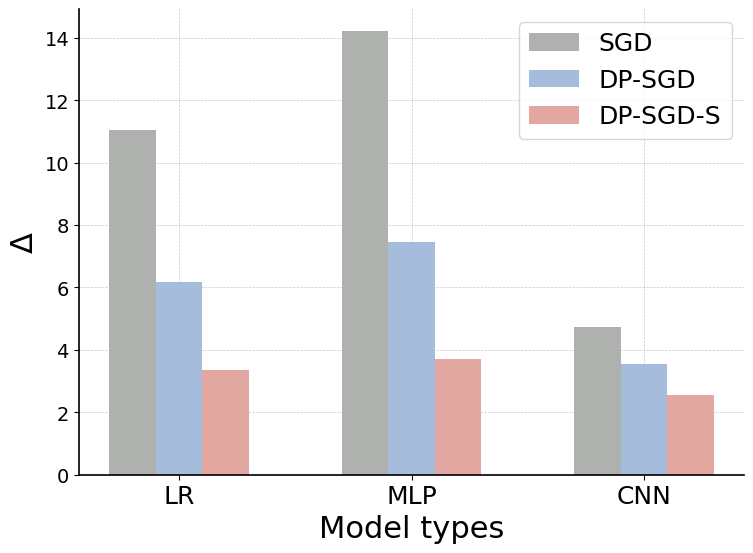

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
categories = ["SGD", "DP-SGD", "DP-SGD-S"]
values = [[0.11031500000000001, 0.061835, 0.03365000000000001],
        [0.14208000000000004, 0.074465, 0.03722500000000002],
        [0.04739499999999998, 0.035555, 0.02567]]
x_labels = ["LR", "MLP", "CNN"]
x = np.arange(len(x_labels))  # x轴位置

# 设置样式
colors = ["#afb1ae", "#a5bcdc", "#e2a7a1"]
bar_width = 0.2


# 全局字体大小设置
plt.rcParams.update({
    "font.size": 22,      # 默认字体大小
    "axes.labelsize": 22, # 坐标轴标签字体大小
    "xtick.labelsize": 18, # x轴刻度字体大小
    "ytick.labelsize": 14  # y轴刻度字体大小
})
fig, ax = plt.subplots(figsize=(8, 6))


# 绘制柱状图
for i in range(3):
    values_list = np.array([row[i] for row in values])
    ax.bar(x + i * bar_width, values_list * 100, bar_width, label=categories[i], color=colors[i])

# 设置标签、标题和网格
ax.set_xlabel("Model types")
ax.set_ylabel(r"$\Delta$")
ax.set_xticks(x + bar_width)
ax.set_xticklabels(x_labels)
ax.legend(frameon=True, loc="upper right", fontsize=18)

# 美化网格
ax.grid(visible=True, linestyle="--", linewidth=0.5, alpha=0.7)
ax.set_axisbelow(True)  # 让网格位于柱状图下方

# 设置边框
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(1.2)
ax.spines["bottom"].set_linewidth(1.2)

# 调整布局并显示
plt.tight_layout()
dataset_name = "mnist"
path = f"exp/demo_{dataset_name}/" + f"{dataset_name}_compare.pdf"
plt.savefig(path, dpi=400, bbox_inches='tight')


### delta and acc across diff scale bound

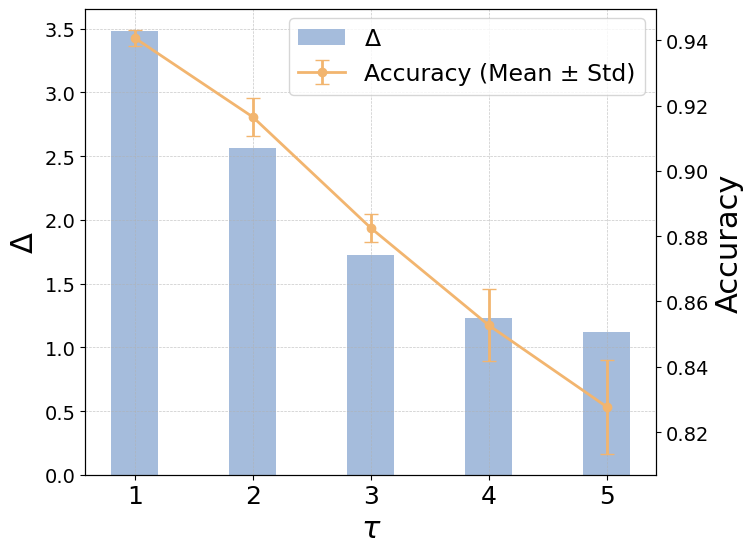

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
x = np.array([1, 2, 3, 4, 5])
delta = np.array([0.03480499999999999, 0.02567, 0.017220000000000013, 0.01228499999999999, 0.011220000000000008]) * 100
accuracy_mean = np.array([0.9407, 0.9165, 0.8825, 0.8527, 0.8277])
accuracy_std = np.array([0.0024, 0.0059, 0.0043, 0.0111, 0.0143])

# 全局字体大小设置
plt.rcParams.update({
    "font.size": 22,      # 默认字体大小
    "axes.labelsize": 22, # 坐标轴标签字体大小
    "xtick.labelsize": 18, # x轴刻度字体大小
    "ytick.labelsize": 14  # y轴刻度字体大小
})
fig, ax1 = plt.subplots(figsize=(8, 6))

# 绘制柱状图（左侧 y 轴）
bar_width = 0.4
ax1.bar(x, delta, bar_width, label=r"$\Delta$", color="#a5bcdc")
ax1.set_xlabel(r"$\tau$")
ax1.set_ylabel(r"$\Delta$")
ax1.tick_params(axis="y")
ax1.set_xticks(x)
ax1.grid(visible=True, linestyle="--", linewidth=0.5, alpha=0.7)

# 添加折线图（右侧 y 轴）
ax2 = ax1.twinx()
ax2.errorbar(x, accuracy_mean, yerr=accuracy_std, fmt="-o", color="#f2b56f", label="Accuracy (Mean ± Std)", capsize=5, markersize=6, linewidth=2)
ax2.set_ylabel("Accuracy")
ax2.tick_params(axis="y")

# 图例和标题
fig.legend(loc="upper right", bbox_to_anchor=(0.85, 0.95), fontsize=17, frameon=True)

# # 美化边框
# ax1.spines["top"].set_visible(False)
# ax2.spines["top"].set_visible(False)

# 调整布局并显示
plt.tight_layout()

path = f"exp/demo_mnist/" + f"scale_compare.pdf"
plt.savefig(path, dpi=400, bbox_inches='tight')

### three group privacy risk

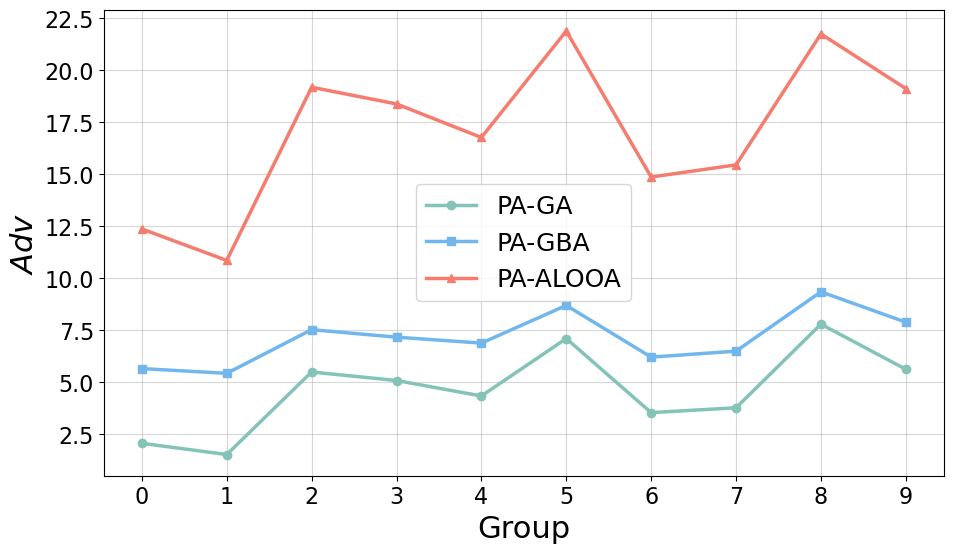

In [41]:
import matplotlib.pyplot as plt
import numpy as np
groups = np.arange(10)

# Data for the three groups
method1=[0.5102574999999999, 0.5075525, 0.5274, 0.525355, 0.521635, 0.535445, 0.517635, 0.5187974999999999, 0.5389, 0.528065]
method2=[0.5282175, 0.5270825, 0.5375775000000002, 0.535775, 0.5343525, 0.5434100000000001, 0.5309775, 0.5324099999999999, 0.54668, 0.53938]
method3=[0.5617975000000001, 0.5542275, 0.59587, 0.59185, 0.5837899999999999, 0.609385, 0.5742825, 0.5772, 0.6087, 0.5955425]

method1 = np.array(method1)
method2 = np.array(method2)
method3 = np.array(method3)

plt.rcParams.update({
    "font.size": 22,      # 默认字体大小
    "axes.labelsize": 22, # 坐标轴标签字体大小
    "xtick.labelsize": 16, # x轴刻度字体大小
    "ytick.labelsize": 16  # y轴刻度字体大小
})
plt.figure(figsize=(10,6))

# Plot each group
plt.plot(groups, (2*method1-1)*100, label="PA-GA", marker='o', linestyle='-', color='#84c3b7', linewidth=2.5)
plt.plot(groups, (2*method2-1)*100, label="PA-GBA", marker='s', linestyle='-', color='#71b7ed', linewidth=2.5)
plt.plot(groups, (2*method3-1)*100, label="PA-ALOOA", marker='^', linestyle='-', color='#f57c6e', linewidth=2.5)

# Add labels, legend, and grid
plt.xticks(groups)
plt.xlabel("Group")
plt.ylabel(r'$Adv$')
plt.legend(fontsize=18)
plt.grid(alpha=0.5)
# plt.ylim(0.5, 0.65)  # Set y-axis limits for better visualization

plt.tight_layout()
#plt.show()
path = "exp/demo_mnist_compare/figs/adv_compare" + f"_LR.pdf"
plt.savefig(path, dpi=400, bbox_inches='tight')
